> <h1>Data loading</h1>

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

In [2]:
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [3]:
# variable information 
print(cdc_diabetes_health_indicators.variables) 

                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

In [4]:
# GenHlth : Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

# MentHlth : Now thinking about your mental health, which includes stress, depression, and problems with emotions, 
# for how many days during the past 30 days was your mental health not good? scale 1-30 days

# phyHlth : Now thinking about your physical health, which includes physical illness and injury, 
# for how many days during the past 30 days was your physical health not good? scale 1-30 days

# Age : 나이

# education : 교육 수준
# Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)

# income : 수입
# Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more

In [5]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [6]:
y.head()

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0


In [7]:
df = pd.concat([X,y], axis = 1)
print(f'df의 행 : {df.shape[0]}, df의 열 : {df.shape[1]}')
print('-------------------------')
df.head()

df의 행 : 253680, df의 열 : 22
-------------------------


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [8]:
type(df)

pandas.core.frame.DataFrame

> <h1>EDA</h1>

> <h3>결측치 확인</h3>

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [10]:
pd.DataFrame(df.isna().sum(), columns=['count'])

,count
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0
Veggies,0


> <h3>변수 특징 확인</h3>

In [11]:
# df[df.columns[0]].value_counts().shape[0]

In [12]:
df.dtypes
# 몇몇 변수는 이진 변수임에도 불구하고 data의 type은 대부분 정수형(int64)

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
Diabetes_binary         int64
dtype: object

In [13]:
unique_value = {}

for col in df.columns:
    unique_value[col] = df[col].value_counts().shape[0]
    
pd.DataFrame(unique_value, index=['unique value count']).T

,unique value count
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2
Veggies,2


In [14]:
# 정수형이나, 변수의 값이 2개인 것은 discrete 변수고 0, 1 두개로 구분되어 있음
# -> model에 대해서 선후관계를 제거하기 위해 범주형 변수에대한 처리가 필요하다고 판단
# one-hot encoding ??

In [15]:
df[['BMI', 'Age', 'MentHlth', 'PhysHlth']].describe().T

# 범주형 변수를 제외하고 기초통계량 출력

,count,mean,std,min,25%,50%,75%,max
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Age,253680.0,8.032119,3.054220,1.0,6.0,8.0,10.0,13.0
MentHlth,253680.0,3.184772,7.412847,0.0,0.0,0.0,2.0,30.0
PhysHlth,253680.0,4.242081,8.717951,0.0,0.0,0.0,3.0,30.0


array([[<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'MentHlth'}>,
        <AxesSubplot:title={'center':'PhysHlth'}>]], dtype=object)

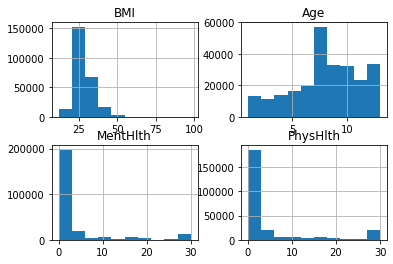

In [16]:
df[['BMI', 'Age', 'MentHlth', 'PhysHlth']].hist()

In [17]:
pd.DataFrame(df['MentHlth'].value_counts()).T

,0,2,30,5,1,3,10,15,4,20,...,16,27,22,17,26,11,13,23,24,19
MentHlth,175680,13054,12088,9030,8538,7381,6373,5505,3789,3364,...,88,79,63,54,45,41,41,38,33,16


> <h3>Data 중복 제거</h3>

In [18]:
df.duplicated()
df_dupli = df[df.duplicated()]
print(df_dupli.shape)
df_dupli.head()

(24206, 22)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
1242,1,1,1,27,1,0,0,0,0,1,...,0,5,0,30,1,0,10,4,5,1
1563,0,0,1,21,1,0,0,1,1,1,...,0,1,0,0,0,0,4,6,8,0
2700,0,0,1,32,0,0,0,1,1,1,...,0,2,0,0,0,0,5,6,8,0
3160,0,0,1,21,0,0,0,1,1,1,...,0,1,0,0,0,0,4,6,8,0
3332,0,0,1,24,0,0,0,1,1,1,...,0,1,0,0,0,1,9,6,8,0


In [19]:
df.drop_duplicates(inplace=True)
print(df.shape)
df.head()

(229474, 22)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


> <h3>Data Distribution 확인</h3>

In [20]:
# # 범주형 변수로의 변환

# cate_var = list(df.columns)

# for i in ['BMI', 'Age', 'MentHlth', 'PhysHlth']:
#     cate_var.remove(i)
    
# print(len(cate_var))
# print(cate_var)

# for cate in cate_var:
#     df[cate] = pd.Categorical(df[cate])

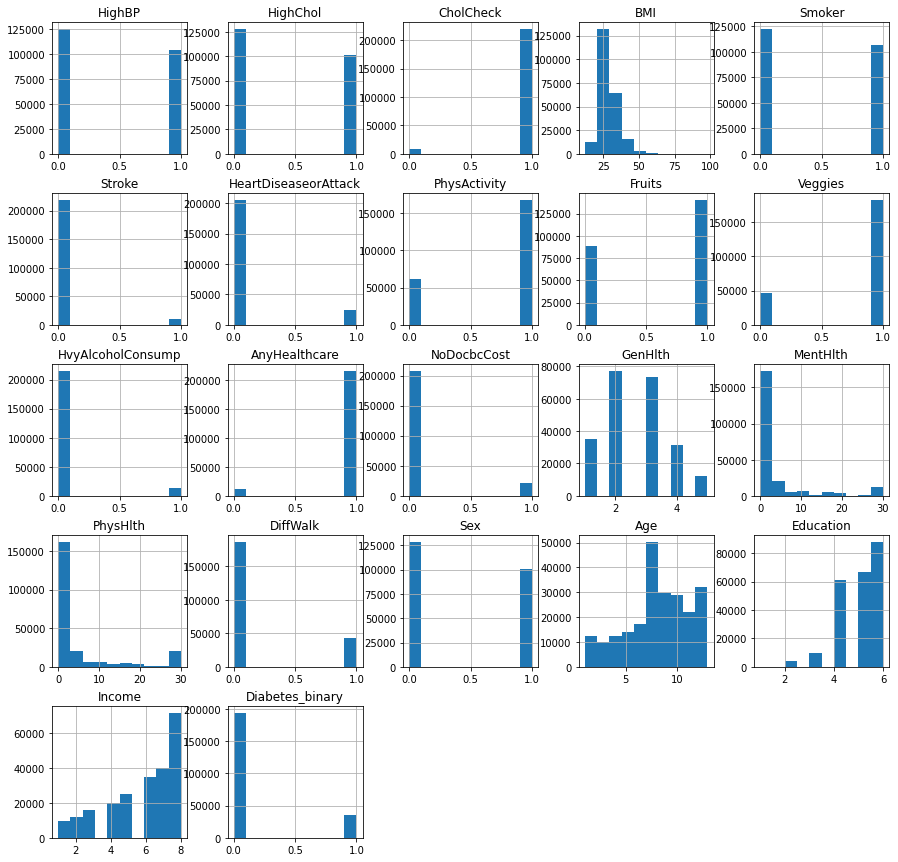

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

df.hist(figsize = (15, 15))
plt.show()
plt.savefig('hist')

> <h3>데이터간의 상관성 확인</h3>

In [22]:
df.corr()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
HighBP,1.000000,0.283963,0.111259,0.194218,0.074264,0.124558,0.201443,-0.104382,-0.019467,-0.042994,...,0.002292,0.272784,0.037482,0.144656,0.211759,0.047119,0.339802,-0.112887,-0.140030,0.254318
HighChol,0.283963,1.000000,0.094772,0.089734,0.074583,0.089375,0.176446,-0.063443,-0.026257,-0.027399,...,0.003020,0.188139,0.050346,0.111008,0.136045,0.022859,0.263841,-0.050045,-0.062089,0.194944
CholCheck,0.111259,0.094772,1.000000,0.042487,-0.003721,0.027955,0.050086,-0.004555,0.017860,-0.000653,...,-0.054128,0.062939,-0.001430,0.040758,0.049107,-0.024332,0.095942,-0.009935,0.001989,0.072523
BMI,0.194218,0.089734,0.042487,1.000000,-0.009294,0.011006,0.039820,-0.127780,-0.067424,-0.044054,...,0.045795,0.208351,0.068569,0.102768,0.182556,0.030902,-0.049223,-0.074433,-0.069097,0.205086
Smoker,0.074264,0.074583,-0.003721,-0.009294,1.000000,0.054414,0.105169,-0.066869,-0.061731,-0.013744,...,0.037335,0.134894,0.077641,0.100447,0.108144,0.096650,0.107695,-0.135657,-0.095314,0.045504
Stroke,0.124558,0.089375,0.027955,0.011006,0.054414,1.000000,0.198814,-0.059306,-0.004486,-0.033029,...,0.028613,0.169809,0.061996,0.140806,0.169339,0.003626,0.128209,-0.064178,-0.117108,0.099193
HeartDiseaseorAttack,0.201443,0.176446,0.050086,0.039820,0.105169,0.198814,1.000000,-0.073094,-0.006946,-0.027180,...,0.021971,0.246328,0.052601,0.170335,0.202657,0.089828,0.223912,-0.082288,-0.122728,0.168213
PhysActivity,-0.104382,-0.063443,-0.004555,-0.127780,-0.066869,-0.059306,-0.073094,1.000000,0.125023,0.135240,...,-0.046440,-0.237511,-0.105914,-0.199307,-0.235719,0.033516,-0.087881,0.170931,0.165869,-0.100404
Fruits,-0.019467,-0.026257,0.017860,-0.067424,-0.061731,-0.004486,-0.006946,0.125023,1.000000,0.242941,...,-0.032387,-0.071221,-0.052191,-0.024441,-0.029932,-0.088768,0.073515,0.084857,0.050907,-0.024805
Veggies,-0.042994,-0.027399,-0.000653,-0.044054,-0.013744,-0.033029,-0.027180,0.135240,0.242941,1.000000,...,-0.019876,-0.094115,-0.042215,-0.045130,-0.063189,-0.066113,-0.003856,0.131624,0.125068,-0.041734


c:\python38-64\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:title={'center':'변수 간 상관계수'}>

c:\python38-64\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


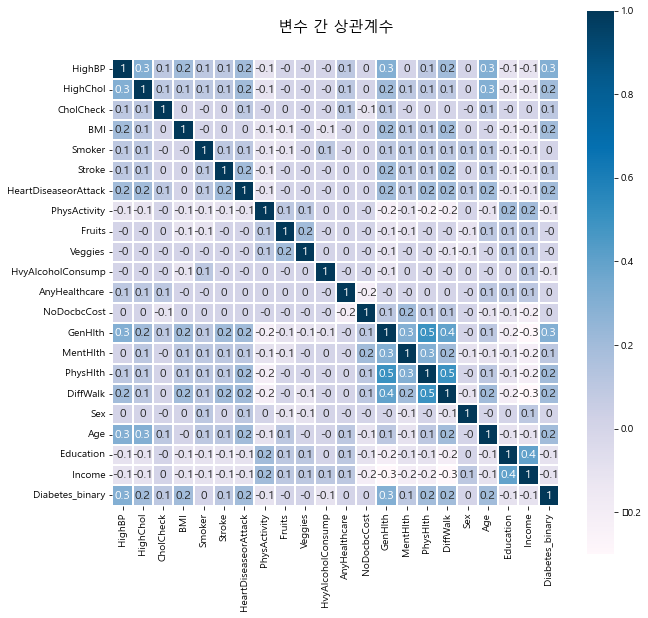

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

ht_data = df[[df.columns[i] for i in range(df.shape[1])]]

from matplotlib import font_manager, rc

font_path = "C:\Windows\Fonts\malgun.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

colormap = plt.cm.PuBu
plt.figure(figsize=(10,10))
plt.title('변수 간 상관계수', y = 1.05, size = 15)
sns.heatmap(round(ht_data.astype(float).corr(),1), linewidths=0.1, vmax=1, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':12})

In [24]:
# 변수 결합을 통한 차원축소를 고려해볼 수도 있겠다
# 1) PhysHlth - GenHlth
# 2) Diffwalk - PhysHlth

c:\python38-64\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


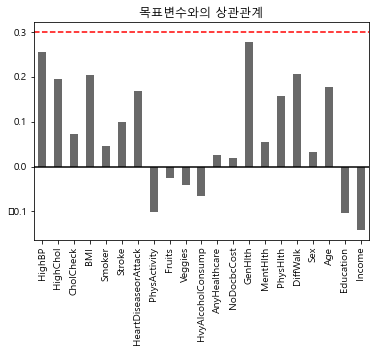

In [106]:
target_cor = df.drop('Diabetes_binary', axis = 1).corrwith(df.Diabetes_binary)
ax = target_cor.plot(kind = 'bar', title = '목표변수와의 상관관계', color = 'dimgrey')
ax.axhline(0, color = 'black', linestyle = '-')
ax.axhline(0.3, color = 'red', linestyle = '--')

plt.show()

# HighBP, GenHlth가 그나마 강한 양의 상관관계
# HighChol, BMI, HeartdiseaseAttack, PhysHlth, Diffwalk, Age는 약한 양의 상관관계

> <h3>Modeling (RandomForest)</h3>

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop(df.columns[-1], axis = 1)
y = df[df.columns[-1]]

In [28]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42) # 학습데이터와 평가데이터의 비율을 8:2 로 분할
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(183579, 21) (45895, 21) (183579,) (45895,)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import optuna

rf = RandomForestClassifier()

In [30]:
def objective(trial_cnt):
    n_estimators = trial_cnt.suggest_int('n_estimators', 50, 100)
    max_depth = trial_cnt.suggest_int('max_depth', 2, 32, log = True)
    
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf.fit(train_x, train_y)
    
    pred = rf.predict(test_x)
    accuracy = accuracy_score(test_y, pred)
    
    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 50)

print('최적의 hyper_parameter :', study.best_params)

In [ ]:
best_rf = RandomForestClassifier(**study.best_params, random_state=42)
best_rf.fit(train_x, train_y)

RandomForestClassifier(max_depth=11, n_estimators=85, random_state=42)

In [32]:
best_rf = RandomForestClassifier(n_estimators=85, max_depth=11, random_state=42)
best_rf.fit(train_x, train_y)

RandomForestClassifier(max_depth=11, n_estimators=85, random_state=42)

In [33]:
best_pred = best_rf.predict(test_x)
accuracy = accuracy_score(test_y, best_pred)
print('정확도 : ', accuracy)

정확도 :  0.8516831898899663


In [34]:
conf_matrix = confusion_matrix(test_y, best_pred)
classification_rep = classification_report(test_y, best_pred)
print('Confusion Matrix')
print(conf_matrix)
print('-----------------------------')
print('Classification Report :')
print(classification_rep)

Confusion Matrix
[[38330   483]
 [ 6324   758]]
-----------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     38813
           1       0.61      0.11      0.18      7082

    accuracy                           0.85     45895
   macro avg       0.73      0.55      0.55     45895
weighted avg       0.82      0.85      0.80     45895



In [35]:
feature_importances = best_rf.feature_importances_
importance = pd.Series(feature_importances, index = df.columns[:-1])
importance_top = importance.sort_values(ascending=False)[:21]

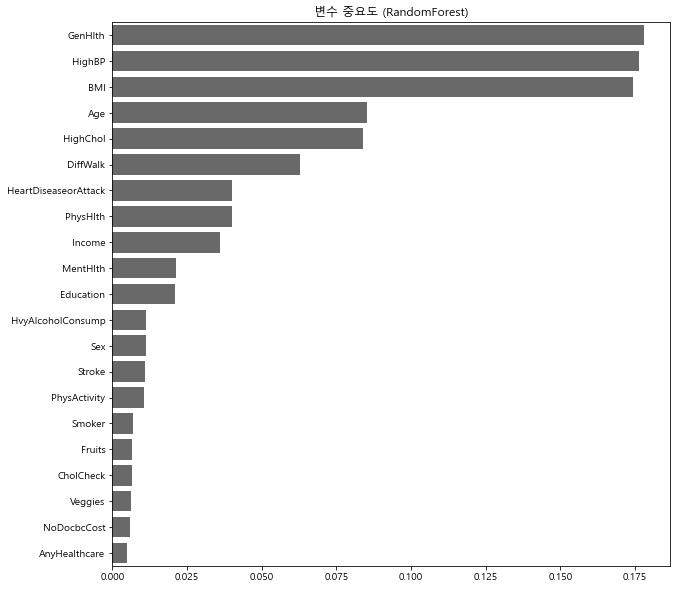

In [100]:
plt.figure(figsize=(10, 10))
plt.title('변수 중요도 (RandomForest)')
sns.barplot(x=importance_top, y=importance_top.index, color='dimgrey')
plt.show()


In [ ]:
# genhlth, highbp, bmi, age, highchol

> <h3>Modeling (LogisticRegression)</h3>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [44]:
y

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    1
253677    0
253678    0
253679    1
Name: Diabetes_binary, Length: 229474, dtype: int64

In [45]:
y = pd.Categorical(y)
print(y)

[0, 0, 0, 0, 0, ..., 0, 1, 0, 0, 1]
Length: 229474
Categories (2, int64): [0, 1]


In [46]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42) # 학습데이터와 평가데이터의 비율을 8:2 로 분할
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인

(183579, 21) (45895, 21) (183579,) (45895,)


In [47]:
def objective2(trial):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform('C', 0.001, 100)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])
    
    lr = LogisticRegression(penalty=penalty, C=C, solver=solver)
    lr.fit(train_x, train_y)
    
    pred = lr.predict(test_x)
    accuracy = accuracy_score(test_y, pred)
    
    return accuracy

In [48]:
study = optuna.create_study(direction='maximize')
study.optimize(objective2, n_trials=50)

print('최적의 hyper_paramter : ', study.best_params)

[I 2023-11-18 04:11:44,000] A new study created in memory with name: no-name-69823092-5723-494c-861e-229104f153ed
C:\Users\nice2\AppData\Local\Temp\ipykernel_4420\1387419344.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 100)
[I 2023-11-18 04:11:46,528] Trial 0 finished with value: 0.8490685259832226 and parameters: {'penalty': 'l2', 'C': 1.583806815539741, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8490685259832226.
C:\Users\nice2\AppData\Local\Temp\ipykernel_4420\1387419344.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 100)
[I 2023-11-18 04:11:48,549] Trial 1 finish

최적의 hyper_paramter :  {'penalty': 'l1', 'C': 0.002264645836265655, 'solver': 'liblinear'}


In [51]:
best_lr = LogisticRegression(penalty='l1', C=0.027, solver='liblinear', random_state=42)
best_lr.fit(train_x, train_y)

best_pred = best_lr.predict(test_x)

In [52]:
accuracy = accuracy_score(test_y, best_pred)
conf_matrix = confusion_matrix(test_y, best_pred)
classification_rep = classification_report(test_y, best_pred)

In [53]:
print(f'Accuracy : {accuracy:.4f}')
print('-----------------------------')
print('Confusion Matrix')
print(conf_matrix)
print('-----------------------------')
print('Classification Report :')
print(classification_rep)

Accuracy : 0.8491
-----------------------------
Confusion Matrix
[[37958   855]
 [ 6069  1013]]
-----------------------------
Classification Report :
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     38813
           1       0.54      0.14      0.23      7082

    accuracy                           0.85     45895
   macro avg       0.70      0.56      0.57     45895
weighted avg       0.81      0.85      0.81     45895



C:\Users\nice2\AppData\Local\Temp\ipykernel_7316\866470950.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  coef_series = pd.Series()


Text(0.5, 1.0, '계수값 (LogisticRegression)')

c:\python38-64\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


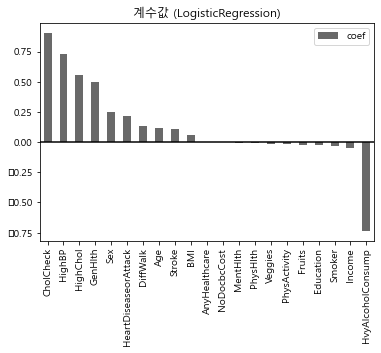

In [102]:
coef_series = pd.Series()

for i in range(0, len(X.columns)):
    coef_series[X.columns[i]] = round(best_lr.coef_[0][i],4)

pd.DataFrame(coef_series, columns=['coef']).sort_values(by='coef', ascending=False).plot.bar(color='dimgrey')
plt.axhline(0, color = 'black')
plt.title('계수값 (LogisticRegression)')